In [ ]:
#MOUNT TO SAVE AND LOAD df of built datasets
#to mount the personal 1612 gmail drive (IMP)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_path = '/content/drive/MyDrive/AiAudio_PR_Project/AiAudio_Dataset'
for_2sec_df_path = df_path+'/for_2sec' #will use it to train and select best model
for_2sec_rerec_df_path = df_path+'/for_2sec_rerec' #retrain, for our scenario, on the selected best model

print("Path to dataset files:", for_2sec_df_path)
print("Path to dataset files:", for_2sec_rerec_df_path)

Path to dataset files: /content/drive/MyDrive/AiAudio_PR_Project/AiAudio_Dataset/for_2sec
Path to dataset files: /content/drive/MyDrive/AiAudio_PR_Project/AiAudio_Dataset/for_2sec_rerec


# Getting data

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mohammedabdeldayem/the-fake-or-real-dataset")


100%|██████████| 16.0G/16.0G [03:36<00:00, 79.4MB/s]

Extracting files...


In [ ]:
import os
cnn_path = os.path.join(path, "for-2sec/for-2seconds")
for_2sec_path=os.path.join(path, "for-2sec/for-2seconds/training")
for_2sec_test_path=os.path.join(path, "for-2sec/for-2seconds/testing")
for_2sec_valid_path=os.path.join(path, "for-2sec/for-2seconds/validation")



print("Path to dataset files:", path)
print("Path to dataset files:", for_2sec_path)

Path to dataset files: /root/.cache/kagglehub/datasets/mohammedabdeldayem/the-fake-or-real-dataset/versions/2
Path to dataset files: /root/.cache/kagglehub/datasets/mohammedabdeldayem/the-fake-or-real-dataset/versions/2/for-2sec/for-2seconds/training


In [ ]:
#RERECORDED FoR DATA, FOR INFERENCE
for_rerec_path_real = os.path.join(path, "for-rerec/for-rerecorded/validation/real")
for_rerec_path_fake = os.path.join(path, "for-rerec/for-rerecorded/validation/fake")

print("Path to rerec real files:", for_rerec_path_real)
print("Path to rerec fake files:", for_rerec_path_fake)

Path to rerec real files: /root/.cache/kagglehub/datasets/mohammedabdeldayem/the-fake-or-real-dataset/versions/2/for-rerec/for-rerecorded/validation/real
Path to rerec fake files: /root/.cache/kagglehub/datasets/mohammedabdeldayem/the-fake-or-real-dataset/versions/2/for-rerec/for-rerecorded/validation/fake


#Feature Extraction

##Function

In [ ]:
import os
import librosa
import numpy as np
import pandas as pd

def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=16000)


    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

    delta_mfccs = librosa.feature.delta(mfccs)

    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)

    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)

    chroma = librosa.feature.chroma_stft(y=y, sr=sr)

    zcr = librosa.feature.zero_crossing_rate(y)

    rms = librosa.feature.rms(y=y)


    features = []
    for feature_set in [mfccs, delta_mfccs, spec_cent, spec_bw, chroma, zcr, rms]:
        features.extend(np.mean(feature_set, axis=1))
        features.extend(np.std(feature_set, axis=1))

    return features


def build_dataset(base_dir):
    data = []
    for label_dir in ['real', 'fake']:
        folder = os.path.join(base_dir, label_dir)
        label = 0 if label_dir == 'real' else 1
        for fname in os.listdir(folder):
            fpath = os.path.join(folder, fname)
            try:
                feats = extract_features(fpath)
                data.append([fpath] + feats + [label])
            except Exception as e:
                print(f"Error with {fpath}: {e}")
    return data


feature_names = [f'mfcc{i}' for i in range(13)] + \
                [f'delta_mfcc{i}' for i in range(13)] + \
                ['spec_cent', 'spec_bw'] + \
                [f'chroma{i}' for i in range(12)] + \
                ['zcr', 'rms']

feature_names = [f"{f}_{stat}" for f in feature_names for stat in ['mean', 'std']]
df_cols = ['filename'] + feature_names + ['label']




##for_2sec Dataset

**No need to run Below again, just load pre-save(unprocessed)**

###The training dataset

In [ ]:
dataset = build_dataset(for_2sec_path)
df = pd.DataFrame(dataset, columns=df_cols)

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.shape

In [ ]:
print(for_2sec_df_path+"/training_df.pkl")

In [ ]:
df.to_pickle(f"{for_2sec_df_path}/training_df.pkl")

###The testing set

In [ ]:
dataset_test = build_dataset(for_2sec_test_path)
df_test = pd.DataFrame(dataset_test, columns=df_cols)

In [ ]:
df_test.head()

In [ ]:
df_test.tail()

In [ ]:
df_test.shape

In [ ]:
df_test.to_pickle(f"{for_2sec_df_path}/testing_df.pkl")

### Loading Dataset


**for_2sec**

In [ ]:
df = pd.read_pickle(f"{for_2sec_df_path}/training_df.pkl")
df_test = pd.read_pickle(f"{for_2sec_df_path}/testing_df.pkl")

In [ ]:
print(df.columns.tolist())

['filename', 'mfcc0_mean', 'mfcc0_std', 'mfcc1_mean', 'mfcc1_std', 'mfcc2_mean', 'mfcc2_std', 'mfcc3_mean', 'mfcc3_std', 'mfcc4_mean', 'mfcc4_std', 'mfcc5_mean', 'mfcc5_std', 'mfcc6_mean', 'mfcc6_std', 'mfcc7_mean', 'mfcc7_std', 'mfcc8_mean', 'mfcc8_std', 'mfcc9_mean', 'mfcc9_std', 'mfcc10_mean', 'mfcc10_std', 'mfcc11_mean', 'mfcc11_std', 'mfcc12_mean', 'mfcc12_std', 'delta_mfcc0_mean', 'delta_mfcc0_std', 'delta_mfcc1_mean', 'delta_mfcc1_std', 'delta_mfcc2_mean', 'delta_mfcc2_std', 'delta_mfcc3_mean', 'delta_mfcc3_std', 'delta_mfcc4_mean', 'delta_mfcc4_std', 'delta_mfcc5_mean', 'delta_mfcc5_std', 'delta_mfcc6_mean', 'delta_mfcc6_std', 'delta_mfcc7_mean', 'delta_mfcc7_std', 'delta_mfcc8_mean', 'delta_mfcc8_std', 'delta_mfcc9_mean', 'delta_mfcc9_std', 'delta_mfcc10_mean', 'delta_mfcc10_std', 'delta_mfcc11_mean', 'delta_mfcc11_std', 'delta_mfcc12_mean', 'delta_mfcc12_std', 'spec_cent_mean', 'spec_cent_std', 'spec_bw_mean', 'spec_bw_std', 'chroma0_mean', 'chroma0_std', 'chroma1_mean', 'chr

## Preprocessing

In [ ]:
X_train = df.drop(columns=['filename', 'label'])
y_train = df['label']

X_test = df_test.drop(columns=['filename', 'label'])
y_test = df_test['label']

In [ ]:
#scaling as the ranges of features varies accross all
#We scale because statistical classifiers (like logistic regression, SVM, KNN, LDA) are sensitive to the scale (range) of feature values.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Important: use transform, not fit_transform

In [ ]:
X_train

In [ ]:
X_train_scaled

# Models Selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score

###Comparing 3 Statistical classifiers

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
print("RF:", rf.score(X_test_scaled, y_test))


svm = SVC(kernel='rbf', C=1, gamma='scale')
svm.fit(X_train_scaled, y_train)
print("SVM:", svm.score(X_test_scaled, y_test))


lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
print("LR:", lr.score(X_test_scaled, y_test))


RF: 0.45128676470588236
SVM: 0.6323529411764706
LR: 0.6369485294117647


In [ ]:


print("SVM Report:")
print(classification_report(y_test, svm.predict(X_test_scaled)))

print("LogReg Report:")
print(classification_report(y_test, lr.predict(X_test_scaled)))


SVM Report:
              precision    recall  f1-score   support

           0       0.59      0.87      0.70       544
           1       0.76      0.39      0.52       544

    accuracy                           0.63      1088
   macro avg       0.67      0.63      0.61      1088
weighted avg       0.67      0.63      0.61      1088

LogReg Report:
              precision    recall  f1-score   support

           0       0.62      0.70      0.66       544
           1       0.66      0.57      0.61       544

    accuracy                           0.64      1088
   macro avg       0.64      0.64      0.64      1088
weighted avg       0.64      0.64      0.64      1088



**SVM** - because lr is less stable

###SVM

####Tuning & COMPARING svm hyperparameters

ReSeaching The good params - cv=3 gave gamma as scale while 5 giving

In [ ]:

from sklearn.model_selection import GridSearchCV

params = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid=params, cv=5, scoring='f1', verbose=1)
grid.fit(X_train_scaled, y_train)
print("Best Params:", grid.best_params_)
print("Best F1 Score:", grid.best_score_)
print("Best Mean Test Score:", grid.cv_results_['mean_test_score'])
print("Best Mean Train Score:", grid.cv_results_['mean_train_score'])

**SVM**
- Best Params: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
- Best F1 Score: 0.9896433774231864


####The SVM model on 86 feaTURES- gamma 0.01 & scale

In [ ]:
svm = SVC(kernel='rbf', C=10, gamma=0.01) #The best svm parameters from tuning and comparing
svm.fit(X_train_scaled, y_train)
print("SVM:", svm.score(X_test_scaled, y_test))

#### svm model with feature reducced- chroma removed (86-24)

**Removing chroma features**

In [ ]:
#triming the features
df_reduced = df.loc[:, ~df.columns.str.startswith('chroma')]
df_test_reduced = df_test.loc[:, ~df_test.columns.str.startswith('chroma')]

print(df_reduced.columns.tolist())
print(df_reduced.shape)

print(df_test_reduced.columns.tolist())
print(df_test_reduced.shape)

['filename', 'mfcc0_mean', 'mfcc0_std', 'mfcc1_mean', 'mfcc1_std', 'mfcc2_mean', 'mfcc2_std', 'mfcc3_mean', 'mfcc3_std', 'mfcc4_mean', 'mfcc4_std', 'mfcc5_mean', 'mfcc5_std', 'mfcc6_mean', 'mfcc6_std', 'mfcc7_mean', 'mfcc7_std', 'mfcc8_mean', 'mfcc8_std', 'mfcc9_mean', 'mfcc9_std', 'mfcc10_mean', 'mfcc10_std', 'mfcc11_mean', 'mfcc11_std', 'mfcc12_mean', 'mfcc12_std', 'delta_mfcc0_mean', 'delta_mfcc0_std', 'delta_mfcc1_mean', 'delta_mfcc1_std', 'delta_mfcc2_mean', 'delta_mfcc2_std', 'delta_mfcc3_mean', 'delta_mfcc3_std', 'delta_mfcc4_mean', 'delta_mfcc4_std', 'delta_mfcc5_mean', 'delta_mfcc5_std', 'delta_mfcc6_mean', 'delta_mfcc6_std', 'delta_mfcc7_mean', 'delta_mfcc7_std', 'delta_mfcc8_mean', 'delta_mfcc8_std', 'delta_mfcc9_mean', 'delta_mfcc9_std', 'delta_mfcc10_mean', 'delta_mfcc10_std', 'delta_mfcc11_mean', 'delta_mfcc11_std', 'delta_mfcc12_mean', 'delta_mfcc12_std', 'spec_cent_mean', 'spec_cent_std', 'spec_bw_mean', 'spec_bw_std', 'zcr_mean', 'zcr_std', 'rms_mean', 'rms_std', 'labe

Preprocessing new reduced dataserrt

In [ ]:
X_reduced_train = df_reduced.drop(columns=['filename', 'label'])

X_reduced_test = df_test_reduced.drop(columns=['filename', 'label'])

In [ ]:
X_reduced_train.shape

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler2 = StandardScaler()
X_reduced_train_scaled = scaler2.fit_transform(X_reduced_train)
X_reduced_test_scaled = scaler2.transform(X_reduced_test)  # Important: use transform, not fit_transform

In [ ]:
X_reduced_train

In [ ]:
X_reduced_train_scaled

Training and comparing

In [ ]:
svm_reduced = SVC(kernel='rbf', C=10, gamma=0.01)
svm_reduced.fit(X_reduced_train_scaled, y_train)
print("SVM:", svm_reduced.score(X_reduced_test_scaled, y_test))

SVM: 0.5854779411764706


In [ ]:
lr_reduced = LogisticRegression(C=0.1, max_iter=500, penalty='l1',solver='liblinear')
lr_reduced.fit(X_reduced_train_scaled, y_train)
print("LR:", lr_reduced.score(X_reduced_test_scaled, y_test))

LR: 0.5900735294117647


**CONCLUSION** : NOT TO REDUCE FEATURE SET as it cost ACCURACY ~ Thus not saving the reduceSVM model


#### svm model with feature reducced- PCA applied ()

###LR

####TUning and  choosing hyperparameters

In [ ]:
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],   # Regularization strength (inverse of lambda)
    'penalty': ['l1', 'l2', 'elasticnet'], # Different regularization types
    'solver': ['liblinear','saga'],       # solvers that support l1 and elasticnet
    'max_iter': [500, 1000]
}


log_reg = LogisticRegression()
grid = GridSearchCV(log_reg, param_grid=params, cv=5, scoring='f1', verbose=1, n_jobs=-1)
grid.fit(X_train_scaled, y_train)

# Display best parameters and best score
print("Best Parameters:", grid.best_params_)
print("Best F1 Score:", grid.best_score_)

# Best model
best_lr = grid.best_estimator_


**LR**
- Best Parameters: {'C': 0.1, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
- Best F1 Score: 0.9098175641027335

### **LORIS** - ensumbled LR & SVM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report

In [ ]:



svm_loris = SVC(kernel='rbf', C=10, gamma=0.01, probability=True)
lr_loris  = LogisticRegression(C=0.1, max_iter=500, penalty='l1',solver='liblinear')

# For storing results
weights = np.arange(0.5, 1.0, 0.1)  #this weight for the lr
ai_f1_scores = []
human_f1_scores = []
macro_f1_scores = []
accuracies = []

for w in weights:
    svm_w = 1 - w
    lr_w  = w

    ensemble = VotingClassifier(
        estimators=[('svm', svm_loris), ('lr', lr_loris)],
        voting='soft',
        weights=[svm_w, lr_w]
    )


    ensemble.fit(X_train_scaled, y_train)

    y_pred = ensemble.predict(X_test_scaled)

    report = classification_report(y_test, y_pred, output_dict=True)

    human_f1 = report['0']['f1-score']
    ai_f1    = report['1']['f1-score']
    macro_f1 = report['macro avg']['f1-score']
    acc      = accuracy_score(y_test, y_pred)

    human_f1_scores.append(human_f1)
    ai_f1_scores.append(ai_f1)
    macro_f1_scores.append(macro_f1)
    accuracies.append(acc)

    print(f"LR weight={w:.1f} | AI F1={ai_f1:.3f} | Human F1={human_f1:.3f} | Macro F1={macro_f1:.3f}")



LR weight=0.5 | AI F1=0.550 | Human F1=0.719 | Macro F1=0.635
LR weight=0.6 | AI F1=0.574 | Human F1=0.712 | Macro F1=0.643
LR weight=0.7 | AI F1=0.583 | Human F1=0.698 | Macro F1=0.641
LR weight=0.8 | AI F1=0.593 | Human F1=0.691 | Macro F1=0.642
LR weight=0.9 | AI F1=0.597 | Human F1=0.667 | Macro F1=0.632


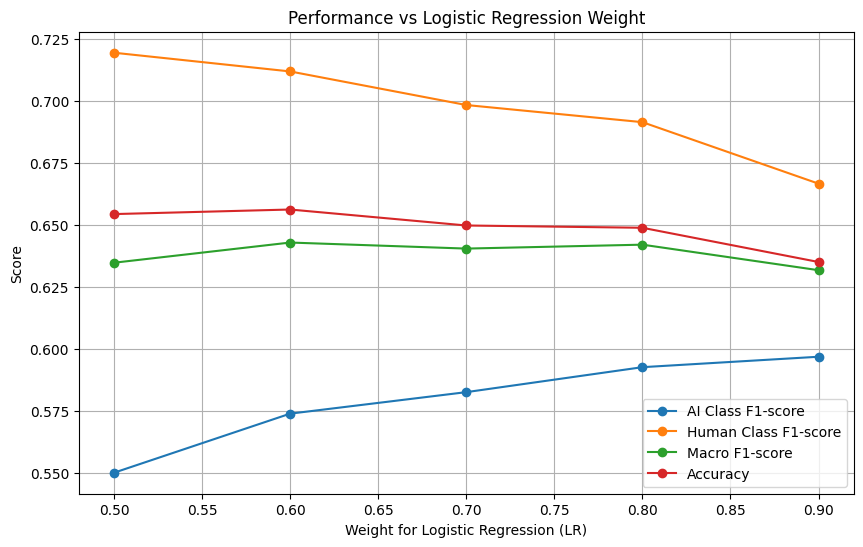

In [ ]:

# -----------------------------
# Plot Performance vs LR Weight
# -----------------------------
plt.figure(figsize=(10,6))
plt.plot(weights, ai_f1_scores, marker='o', label='AI Class F1-score')
plt.plot(weights, human_f1_scores, marker='o', label='Human Class F1-score')
plt.plot(weights, macro_f1_scores, marker='o', label='Macro F1-score')
plt.plot(weights, accuracies, marker='o', label='Accuracy')

plt.title("Performance vs Logistic Regression Weight")
plt.xlabel("Weight for Logistic Regression (LR)")
plt.ylabel("Score")
plt.grid(True)
plt.legend()
plt.show()

#MODEL


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report

In [ ]:
model_path = '/content/drive/MyDrive/AiAudio_PR_Project/AiAudio_Model'
svm_m_path = model_path+'/svm' #will use it to train and select best model
svm_reduced_m_path = model_path+'/svm_reduced'
lr_m_path = model_path+'/lr'
lr_reduced_m_path = model_path + '/lr_reduced' #retrain, for our scenario, on the selected best model
loris1_m_path = model_path + '/loris1'
loris2_m_path = model_path + '/loris2'

print("Path to SVM Model:", svm_m_path)
print("Path to SVM Reduced Model:", svm_reduced_m_path)
print("Path to LR Model:", lr_m_path)

Path to SVM Model: /content/drive/MyDrive/AiAudio_PR_Project/AiAudio_Model/svm
Path to SVM Reduced Model: /content/drive/MyDrive/AiAudio_PR_Project/AiAudio_Model/svm_reduced
Path to LR Model: /content/drive/MyDrive/AiAudio_PR_Project/AiAudio_Model/lr


### Training -  no need run for loaded models

In [ ]:
svm = SVC(kernel='rbf', C=10, gamma=0.01) #The best svm parameters from tuning and comparing
svm.fit(X_train_scaled, y_train)
svm_y_pred = svm.predict(X_test_scaled)
svm_acc = accuracy_score(y_test, svm_y_pred)
svm_f1 = f1_score(y_test, svm_y_pred, average='weighted')

print("SVM ACCURACY:", svm_acc)
print("SVM f1 score:", svm_f1)
print("SVM:", svm.score(X_test_scaled, y_test))

SVM ACCURACY: 0.6332720588235294
SVM f1 score: 0.6001823582233887
SVM: 0.6332720588235294


In [ ]:
X_test_scaled.shape

In [ ]:
svm_reduced = SVC(kernel='rbf', C=10, gamma=0.01)
svm_reduced.fit(X_reduced_train_scaled, y_train)
svm_reduced_y_pred = svm_reduced.predict(X_reduced_test_scaled)
svm_reduced_acc = accuracy_score(y_test, svm_reduced_y_pred)
svm_reduced_f1 = f1_score(y_test, svm_reduced_y_pred, average='weighted')

print("SVM ACCURACY:", svm_reduced_acc)
print("SVM f1 score:", svm_reduced_f1)
print("SVM:", svm_reduced.score(X_reduced_test_scaled, y_test))

SVM ACCURACY: 0.5854779411764706
SVM f1 score: 0.538538654328128
SVM: 0.5854779411764706


In [ ]:
lr = LogisticRegression(C=0.1, max_iter=500, penalty='l1',solver='liblinear')
lr.fit(X_train_scaled, y_train)
lr_y_pred = lr.predict(X_test_scaled)
lr_acc = accuracy_score(y_test, lr_y_pred)
lr_f1 = f1_score(y_test, lr_y_pred, average='weighted')

print("LR ACCURACY:", lr_acc)
print("LR f1 score:", lr_f1)

LR ACCURACY: 0.6378676470588235
LR f1 score: 0.6357988819221423


In [ ]:
lr_reduced = LogisticRegression(C=0.1, max_iter=500, penalty='l1',solver='liblinear')
lr_reduced.fit(X_reduced_train_scaled, y_train)
lr_reduced_y_pred = lr_reduced.predict(X_reduced_test_scaled)
lr_reduced_acc = accuracy_score(y_test, lr_reduced_y_pred)
lr_reduced_f1 = f1_score(y_test, lr_reduced_y_pred, average='weighted')

print("LR reduced ACCURACY:", lr_reduced_acc)
print("le reduced f1 score:", lr_reduced_f1)
print("LR REDUCED:", lr_reduced.score(X_reduced_test_scaled, y_test))

LR reduced ACCURACY: 0.5900735294117647
le reduced f1 score: 0.589934963966522
LR REDUCED: 0.5900735294117647


In [ ]:

svm_loris = SVC(kernel='rbf', C=10, gamma=0.01, probability=True)
lr_loris  = LogisticRegression(C=0.1, max_iter=500, penalty='l1',solver='liblinear')

loris1 = VotingClassifier(
    estimators=[('svm', svm_loris), ('lr', lr_loris)],
    voting='soft',
    weights=[0.3, 0.7]  # [svm_weight, lr_weight]
)

loris1.fit(X_train_scaled, y_train)
print("Accuracy:", loris1.score(X_test_scaled, y_test))


Accuracy: 0.6488970588235294


In [ ]:

svm_loris2 = SVC(kernel='rbf', C=10, gamma=0.01, probability=True)
lr_loris2  = LogisticRegression(C=0.1, max_iter=500, penalty='l1',solver='liblinear')

loris2 = VotingClassifier(
    estimators=[('svm', svm_loris2), ('lr', lr_loris2)],
    voting='soft',
    weights=[0.1, 0.9]  # [svm_weight, lr_weight]
)

loris2.fit(X_train_scaled, y_train)
print("Accuracy:", loris2.score(X_test_scaled, y_test))


Accuracy: 0.6351102941176471


### Saving Model


SVM

In [ ]:
import pickle

with open(svm_m_path, "wb") as f:
    pickle.dump(svm, f)

print(f"Model saved at: {svm_m_path}")


Model saved at: /content/drive/MyDrive/AiAudio_PR_Project/AiAudio_Model/svm


LR

In [ ]:
import pickle

with open(lr_m_path, "wb") as f:
    pickle.dump(lr, f)

print(f"Model saved at: {lr_m_path}")


Model saved at: /content/drive/MyDrive/AiAudio_PR_Project/AiAudio_Model/lr


SVM_REDUCED (NO CHROMA)

In [ ]:
import pickle

with open(svm_reduced_m_path, "wb") as f:
    pickle.dump(svm_reduced, f)

print(f"Model saved at: {svm_reduced_m_path}")


Model saved at: /content/drive/MyDrive/AiAudio_PR_Project/AiAudio_Model/svm_reduced


LR_Reduced

In [ ]:
import pickle

with open(lr_reduced_m_path, "wb") as f:
    pickle.dump(lr_reduced, f)

print(f"Model saved at: {lr_reduced_m_path}")


Model saved at: /content/drive/MyDrive/AiAudio_PR_Project/AiAudio_Model/lr_reduced


Loris 1 and 2

In [ ]:
import pickle

with open(loris1_m_path, "wb") as f:
    pickle.dump(loris1, f)

print(f"Model saved at: {loris1_m_path}")

Model saved at: /content/drive/MyDrive/AiAudio_PR_Project/AiAudio_Model/loris1


In [ ]:
import pickle

with open(loris2_m_path, "wb") as f:
    pickle.dump(loris2, f)

print(f"Model saved at: {loris2_m_path}")

Model saved at: /content/drive/MyDrive/AiAudio_PR_Project/AiAudio_Model/loris2


###Loading Model


In [ ]:
import pickle

with open(svm_m_path, "rb") as f:
    svm = pickle.load(f)

In [ ]:
import pickle

with open(svm_reduced_m_path, "rb") as f:
    svm_reduced = pickle.load(f)

In [ ]:
import pickle

with open(lr_reduced_m_path, "rb") as f:
    lr_reduced = pickle.load(f)

In [ ]:
import pickle

with open(loris1_m_path, "rb") as f:
    loris1 = pickle.load(f)

In [ ]:
import pickle

with open(loris1_m_path, "rb") as f:
    loris1 = pickle.load(f)

In [ ]:
import pickle

with open(loris2_m_path, "rb") as f:
    loris2 = pickle.load(f)

## Comparision PLOTS

#### LR VS SVM Plots

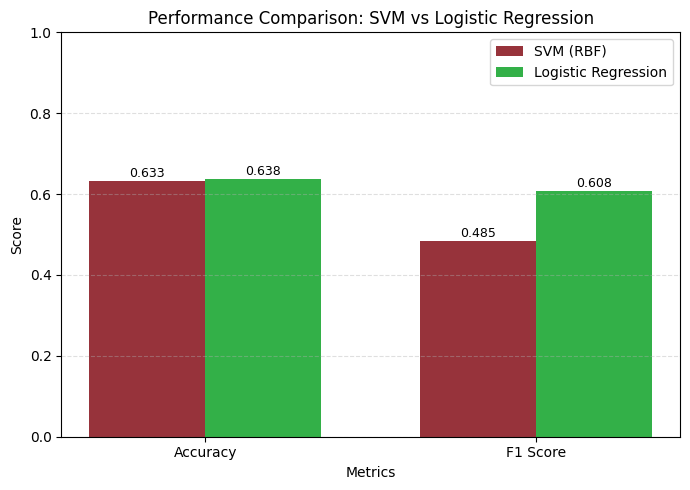

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

# Compute metrics
svm_acc = accuracy_score(y_test, svm_y_pred)
svm_f1 = f1_score(y_test, svm_y_pred)
lr_acc = accuracy_score(y_test, lr_y_pred)
lr_f1 = f1_score(y_test, lr_y_pred)

# Prepare data
metrics = ['Accuracy', 'F1 Score']
svm_scores = [svm_acc, svm_f1]
lr_scores = [lr_acc, lr_f1]

# --- Plot ---
plt.figure(figsize=(7,5))
bar_width = 0.35
x = range(len(metrics))

# Custom colors
svm_color = '#7d000a'
lr_color = '#009c1a'    # orange

# Bars
bars1 = plt.bar(x, svm_scores, width=bar_width, label='SVM (RBF)', color=svm_color, alpha=0.8)
bars2 = plt.bar([i + bar_width for i in x], lr_scores, width=bar_width, label='Logistic Regression', color=lr_color, alpha=0.8)

# Labels and formatting
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Performance Comparison: SVM vs Logistic Regression')
plt.xticks([i + bar_width/2 for i in x], metrics)
plt.ylim(0, 1)  # zoomed-in range
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Add values on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.002, f"{yval:.3f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plot_path = "/content/drive/MyDrive/AiAudio_PR_Project/AiAudio_Plot"
plt.savefig(plot_path+"/svm_vs_lr.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
import matplotlib.pyplot as plt


cv_results = cross_validate(
    svm,
    X_train_scaled,
    y_train,
    cv=5,
    return_train_score=True
)

Training accuracy per fold: [0.99991043 1.         0.99991043 0.99991043 1.        ]
Validation accuracy per fold: [0.99032951 0.98781799 0.98925116 0.99175923 0.98889287]
Mean Training Accuracy: 0.9999462590313726
Mean Validation Accuracy: 0.9896101519517811


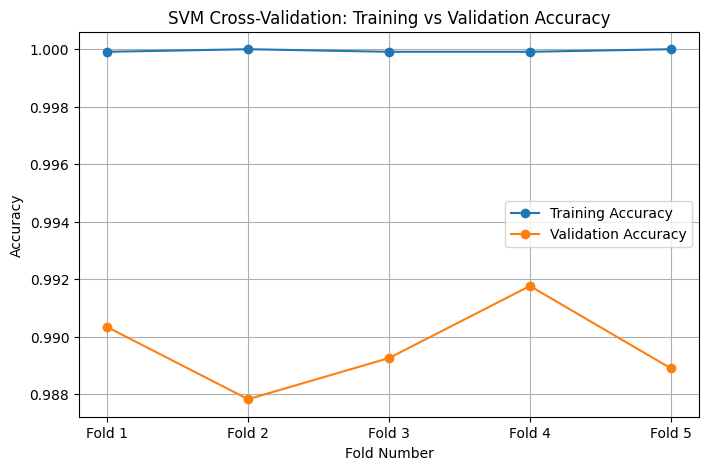

In [ ]:
svm_train_acc = cv_results['train_score']
svm_val_acc = cv_results['test_score']

print("Training accuracy per fold:", svm_train_acc)
print("Validation accuracy per fold:", svm_val_acc)
print("Mean Training Accuracy:", np.mean(svm_train_acc))
print("Mean Validation Accuracy:", np.mean(svm_val_acc))


plt.figure(figsize=(8,5))
plt.plot(svm_train_acc, marker='o', label='Training Accuracy')
plt.plot(svm_val_acc, marker='o', label='Validation Accuracy')
plt.title("SVM Cross-Validation: Training vs Validation Accuracy")
plt.xlabel("Fold Number")
plt.ylabel("Accuracy")
plt.xticks(range(5), ['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5'])
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
import matplotlib.pyplot as plt


cv_results = cross_validate(
    lr,
    X_train_scaled,
    y_train,
    cv=5,
    return_train_score=True
)

Training accuracy per fold: [0.91105339 0.91321093 0.91383789 0.9124944  0.91141961]
Validation accuracy per fold: [0.91439828 0.90684343 0.90433536 0.91042637 0.91257614]
Mean Training Accuracy: 0.9124032432312742
Mean Validation Accuracy: 0.9097159155656896


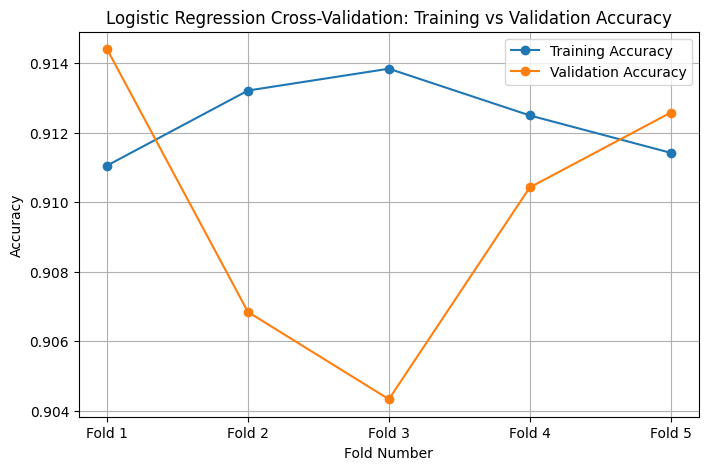

In [ ]:
lr_train_acc = cv_results['train_score']
lr_val_acc = cv_results['test_score']

print("Training accuracy per fold:", lr_train_acc)
print("Validation accuracy per fold:", lr_val_acc)
print("Mean Training Accuracy:", np.mean(lr_train_acc))
print("Mean Validation Accuracy:", np.mean(lr_val_acc))


plt.figure(figsize=(8,5))
plt.plot(lr_train_acc, marker='o', label='Training Accuracy')
plt.plot(lr_val_acc, marker='o', label='Validation Accuracy')
plt.title("Logistic Regression Cross-Validation: Training vs Validation Accuracy")
plt.xlabel("Fold Number")
plt.ylabel("Accuracy")
plt.xticks(range(5), ['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5'])
plt.legend()
plt.grid(True)
plt.show()


# Prediction of Audio

In [ ]:
#IMPORTANT
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")
#we get the warning, difficult to see output, the warning is not error, does not affect the performance or anything of such sort

In [ ]:
#Sample Path
import os
sample_path ="/content/drive/MyDrive/AiAudio_PR_Project/Self_Generated_Test_Samples"
audio_files = [f for f in os.listdir(sample_path) if f.endswith(('.mp3', '.webm'))]

In [ ]:
audio_files

['ROOM IITI 1.mp3',
 'Room IITI 2.mp3',
 'voice over for navtri night.mp3',
 '(AI) After cleaning.mp3',
 '(AI) Bapunagar nahee, bapu nadee yes.mp3',
 '(AI) Before cleaning.mp3']

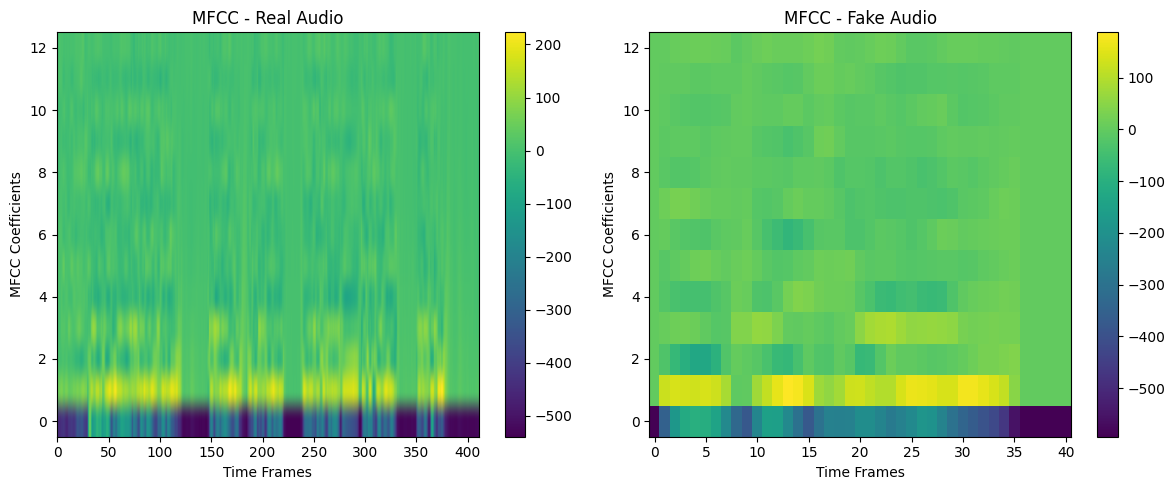

In [ ]:
#MFCC of real and fake
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

def plot_mfcc(audio_path, title):
    y, sr = librosa.load(audio_path, sr=16000)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

    plt.imshow(mfcc, aspect='auto', origin='lower')
    plt.colorbar()
    plt.title(title)
    plt.xlabel("Time Frames")
    plt.ylabel("MFCC Coefficients")

real_audio_path = os.path.join(sample_path, 'ROOM IITI 1.mp3')
fake_audio_path = os.path.join(sample_path, '(AI) After cleaning.mp3')

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_mfcc(real_audio_path, "MFCC - Real Audio")

plt.subplot(1, 2, 2)
plot_mfcc(fake_audio_path, "MFCC - Fake Audio")

plt.tight_layout()
plt.show()


###**OWN SAMPLES**

**REAL IS 0 and FAKE IS 1** - Testing on mixed samples (3 real , 3 fake)

In [ ]:
def single_audio_features(file_path):
    y, sr = librosa.load(file_path, sr=16000)


    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

    delta_mfccs = librosa.feature.delta(mfccs)

    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)

    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)

    chroma = librosa.feature.chroma_stft(y=y, sr=sr)

    zcr = librosa.feature.zero_crossing_rate(y)

    rms = librosa.feature.rms(y=y)


    features = []
    for feature_set in [mfccs, delta_mfccs, spec_cent, spec_bw, chroma, zcr, rms]:
        features.extend(np.mean(feature_set, axis=1))
        features.extend(np.std(feature_set, axis=1))

    return features

In [ ]:
def reduced_single_audio_features(file_path):
    y, sr = librosa.load(file_path, sr=16000)


    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

    delta_mfccs = librosa.feature.delta(mfccs)

    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)

    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)

    # chroma = librosa.feature.chroma_stft(y=y, sr=sr)

    zcr = librosa.feature.zero_crossing_rate(y)

    rms = librosa.feature.rms(y=y)


    features = []
    for feature_set in [mfccs, delta_mfccs, spec_cent, spec_bw, zcr, rms]:
        features.extend(np.mean(feature_set, axis=1))
        features.extend(np.std(feature_set, axis=1))

    return features

In [ ]:
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")

for file in audio_files:
    file_path = os.path.join(sample_path, file)
    features = single_audio_features(file_path)
    features_scaled = scaler.transform([features])

    prediction = svm.predict(features_scaled)[0]
    label = "AI-generated" if prediction == 1 else "Human"

    print(f"{file}: {label}")


ROOM IITI 1.mp3: Human
Room IITI 2.mp3: Human
voice over for navtri night.mp3: Human
(AI) After cleaning.mp3: Human
(AI) Bapunagar nahee, bapu nadee yes.mp3: AI-generated
(AI) Before cleaning.mp3: Human


SVM 4/6 accuracy

In [ ]:
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")

for file in audio_files:
    file_path = os.path.join(sample_path, file)
    features = single_audio_features(file_path)
    features_scaled = scaler.transform([features])

    prediction = lr.predict(features_scaled)[0]
    label = "AI-generated" if prediction == 1 else "Human"

    print(f"{file}: {label}")


ROOM IITI 1.mp3: Human
Room IITI 2.mp3: Human
voice over for navtri night.mp3: Human
(AI) After cleaning.mp3: AI-generated
(AI) Bapunagar nahee, bapu nadee yes.mp3: AI-generated
(AI) Before cleaning.mp3: AI-generated


LR 100% accuracy

> Add blockquote



###**FOR-RERECORDED VALIDATION SAMPLES**

In [ ]:
#DOWNLOAD FoR dataset from kaggle first
print("Path to rerec real files:", for_rerec_path_real)
print("Path to rerec fake files:", for_rerec_path_fake)

Path to rerec real files: /root/.cache/kagglehub/datasets/mohammedabdeldayem/the-fake-or-real-dataset/versions/2/for-rerec/for-rerecorded/validation/real
Path to rerec fake files: /root/.cache/kagglehub/datasets/mohammedabdeldayem/the-fake-or-real-dataset/versions/2/for-rerec/for-rerecorded/validation/fake


- REAL 1101 files (wav)

In [ ]:
#SVM
correct = 0
total = 0

for file_name in os.listdir(for_rerec_path_real):
    if file_name.endswith(".wav"):
        file_path = os.path.join(for_rerec_path_real, file_name)

        features = single_audio_features(file_path)

        features_scaled = scaler.transform([features])

        pred = svm.predict(features_scaled)[0]

        if pred == 0:
            correct += 1
        total += 1

svm_real_accuracy = correct / total if total > 0 else 0
print(f"Predicted {correct}/{total} correctly as real (accuracy = {svm_real_accuracy*100:.2f}%)")


Predicted 980/1101 correctly as real (accuracy = 89.01%)


In [ ]:
#SVM reduced
correct = 0
total = 0


for file_name in os.listdir(for_rerec_path_real):
    if file_name.endswith(".wav"):
        file_path = os.path.join(for_rerec_path_real, file_name)

        features = reduced_single_audio_features(file_path)

        features_scaled = scaler2.transform([features])

        pred = svm_reduced.predict(features_scaled)[0]

        if pred == 0:
            correct += 1
        total += 1

svm_reduced_real_accuracy = correct / total if total > 0 else 0
print(f"Predicted {correct}/{total} correctly as real (accuracy = {svm_reduced_real_accuracy*100:.2f}%)")


Predicted 999/1101 correctly as real (accuracy = 90.74%)


In [ ]:
#LR
correct = 0
total = 0

for file_name in os.listdir(for_rerec_path_real):
    if file_name.endswith(".wav"):
        file_path = os.path.join(for_rerec_path_real, file_name)

        features = single_audio_features(file_path)

        features_scaled = scaler.transform([features])

        pred = lr.predict(features_scaled)[0]

        if pred == 0:
            correct += 1
        total += 1

lr_real_accuracy = correct / total if total > 0 else 0
print(f"Predicted {correct}/{total} correctly as real (accuracy = {lr_real_accuracy*100:.2f}%)")


Predicted 922/1101 correctly as real (accuracy = 83.74%)


In [ ]:
#LR_REDUCED
correct = 0
total = 0


for file_name in os.listdir(for_rerec_path_real):
    if file_name.endswith(".wav"):
        file_path = os.path.join(for_rerec_path_real, file_name)

        features = reduced_single_audio_features(file_path)

        features_scaled = scaler2.transform([features])

        pred = lr_reduced.predict(features_scaled)[0]

        if pred == 0:
            correct += 1
        total += 1

lr_reduced_real_accuracy = correct / total if total > 0 else 0
print(f"Predicted {correct}/{total} correctly as real (accuracy = {lr_reduced_real_accuracy*100:.2f}%)")


Predicted 765/1101 correctly as real (accuracy = 69.48%)


In [ ]:
#LORIS -0.3 svm, 0.7 lr
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")
correct = 0
total = 0

for file_name in os.listdir(for_rerec_path_real):
    if file_name.endswith(".wav"):
        file_path = os.path.join(for_rerec_path_real, file_name)

        features = single_audio_features(file_path)

        features_scaled = scaler.transform([features])

        pred = loris1.predict(features_scaled)[0]

        if pred == 0:
            correct += 1
        total += 1

loris1_real_accuracy = correct / total if total > 0 else 0
print(f"Predicted {correct}/{total} correctly as real (accuracy = {loris1_real_accuracy*100:.2f}%)")

Predicted 978/1101 correctly as real (accuracy = 88.83%)


In [ ]:
#LORIS2 - 0.1 svm, 0.9 lr

correct = 0
total = 0

for file_name in os.listdir(for_rerec_path_real):
    if file_name.endswith(".wav"):
        file_path = os.path.join(for_rerec_path_real, file_name)

        features = single_audio_features(file_path)

        features_scaled = scaler.transform([features])

        pred = loris2.predict(features_scaled)[0]

        if pred == 0:
            correct += 1
        total += 1

loris2_real_accuracy = correct / total if total > 0 else 0
print(f"Predicted {correct}/{total} correctly as real (accuracy = {loris2_real_accuracy*100:.2f}%)")

Predicted 932/1101 correctly as real (accuracy = 84.65%)


- fake 1143 files (wav)

In [ ]:
#SVM
correct = 0
total = 0

for file_name in os.listdir(for_rerec_path_fake):
    if file_name.endswith(".wav"):
        file_path = os.path.join(for_rerec_path_fake, file_name)

        features = single_audio_features(file_path)

        features_scaled = scaler.transform([features])

        pred = svm.predict(features_scaled)[0]

        if pred == 1:
            correct += 1
        total += 1

svm_fake_accuracy = correct / total if total > 0 else 0
print(f"Predicted {correct}/{total} correctly as fake (accuracy = {svm_fake_accuracy*100:.2f}%)")


Predicted 382/1143 correctly as fake (accuracy = 33.42%)


In [ ]:
#SVM reduced
correct = 0
total = 0


for file_name in os.listdir(for_rerec_path_fake):
    if file_name.endswith(".wav"):
        file_path = os.path.join(for_rerec_path_fake, file_name)

        features = reduced_single_audio_features(file_path)

        features_scaled = scaler2.transform([features])

        pred = svm_reduced.predict(features_scaled)[0]

        if pred == 1:
            correct += 1
        total += 1

svm_reduced_fake_accuracy = correct / total if total > 0 else 0
print(f"Predicted {correct}/{total} correctly as fake (accuracy = {svm_reduced_fake_accuracy*100:.2f}%)")


Predicted 342/1143 correctly as fake (accuracy = 29.92%)


In [ ]:
#LR
correct = 0
total = 0

for file_name in os.listdir(for_rerec_path_fake):
    if file_name.endswith(".wav"):
        file_path = os.path.join(for_rerec_path_fake, file_name)

        features = single_audio_features(file_path)

        features_scaled = scaler.transform([features])

        pred = lr.predict(features_scaled)[0]

        if pred == 1:
            correct += 1
        total += 1

lr_fake_accuracy = correct / total if total > 0 else 0
print(f"Predicted {correct}/{total} correctly as fake (accuracy = {lr_fake_accuracy*100:.2f}%)")


Predicted 927/1143 correctly as fake (accuracy = 81.10%)


In [ ]:
#lr reduced
correct = 0
total = 0


for file_name in os.listdir(for_rerec_path_fake):
    if file_name.endswith(".wav"):
        file_path = os.path.join(for_rerec_path_fake, file_name)

        features = reduced_single_audio_features(file_path)

        features_scaled = scaler2.transform([features])

        pred = lr_reduced.predict(features_scaled)[0]

        if pred == 1:
            correct += 1
        total += 1

lr_reduced_fake_accuracy = correct / total if total > 0 else 0
print(f"Predicted {correct}/{total} correctly as fake (accuracy = {lr_reduced_fake_accuracy*100:.2f}%)")


Predicted 920/1143 correctly as fake (accuracy = 80.49%)


In [ ]:
#LORIS
correct = 0
total = 0

for file_name in os.listdir(for_rerec_path_fake):
    if file_name.endswith(".wav"):
        file_path = os.path.join(for_rerec_path_fake, file_name)

        features = single_audio_features(file_path)

        features_scaled = scaler.transform([features])

        pred = loris1.predict(features_scaled)[0]

        if pred == 1:
            correct += 1
        total += 1

loris1_fake_accuracy = correct / total if total > 0 else 0
print(f"Predicted {correct}/{total} correctly as fake (accuracy = {loris1_fake_accuracy*100:.2f}%)")

Predicted 828/1143 correctly as fake (accuracy = 72.44%)


In [ ]:
#LORIS2
correct = 0
total = 0

for file_name in os.listdir(for_rerec_path_fake):
    if file_name.endswith(".wav"):
        file_path = os.path.join(for_rerec_path_fake, file_name)

        features = single_audio_features(file_path)

        features_scaled = scaler.transform([features])

        pred = loris2.predict(features_scaled)[0]

        if pred == 1:
            correct += 1
        total += 1

loris2_fake_accuracy = correct / total if total > 0 else 0
print(f"Predicted {correct}/{total} correctly as fake (accuracy = {loris2_fake_accuracy*100:.2f}%)")

Predicted 901/1143 correctly as fake (accuracy = 78.83%)


**CONCLUSION**:
- SEEMS LIKE **SVM** IS HUMAN BIASED, Achieving more accuracy in REAL audio prediction and bad performance in AI Generated.
- LR gave lesser accuracy for REAL audio prediction than SVM but doesn't degrade when it comes to Fake audio prediction staying more stable.

In [ ]:
print(" ------ REAL ACCURACIES ------ ")
print("SVM:",svm_real_accuracy)
print("SVM Reduced:",svm_reduced_real_accuracy)
print("LR:",lr_real_accuracy)
print("LR Reduced:",lr_reduced_real_accuracy)

print("LORIS1:",loris1_real_accuracy)
print("LORIS2:",loris2_real_accuracy)

 ------ REAL ACCURACIES ------ 
SVM: 0.8900999091734787
SVM Reduced: 0.9073569482288828
LR: 0.8374205267938238
LR Reduced: 0.6948228882833788
LORIS1: 0.888283378746594
LORIS2: 0.846503178928247


In [ ]:
print(" ------ FAKE ACCURACIES ------ ")
print("SVM:",svm_fake_accuracy)
print("SVM Reduced:",svm_reduced_fake_accuracy)
print("LR:",lr_fake_accuracy)
print("LR Reduced:",lr_reduced_fake_accuracy)

print("LORIS1:",loris1_fake_accuracy)
print("LORIS2:",loris2_fake_accuracy)

 ------ FAKE ACCURACIES ------ 
SVM: 0.3342082239720035
SVM Reduced: 0.2992125984251969
LR: 0.8110236220472441
LR Reduced: 0.8048993875765529
LORIS1: 0.7244094488188977
LORIS2: 0.7882764654418197


 ------ REAL ACCURACIES ------
- SVM: 0.8900999091734787
- SVM Reduced: 0.9073569482288828
- LR: 0.8374205267938238
- LR Reduced: 0.6948228882833788
- LORIS1: 0.888283378746594
- LORIS2: 0.846503178928247

 ------ FAKE ACCURACIES ------
- SVM: 0.3342082239720035
- SVM Reduced: 0.2992125984251969
- LR: 0.8110236220472441
- LR Reduced: 0.8048993875765529
- LORIS1: 0.7244094488188977
- LORIS2: 0.7882764654418197

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ["SVM", "SVM (Reduced)", "LR", "LR (Reduced)"]


real_acc = [svm_real_accuracy, svm_reduced_real_accuracy, lr_real_accuracy, lr_reduced_real_accuracy]

fake_acc = [svm_fake_accuracy, svm_reduced_fake_accuracy, lr_fake_accuracy, lr_reduced_fake_accuracy]


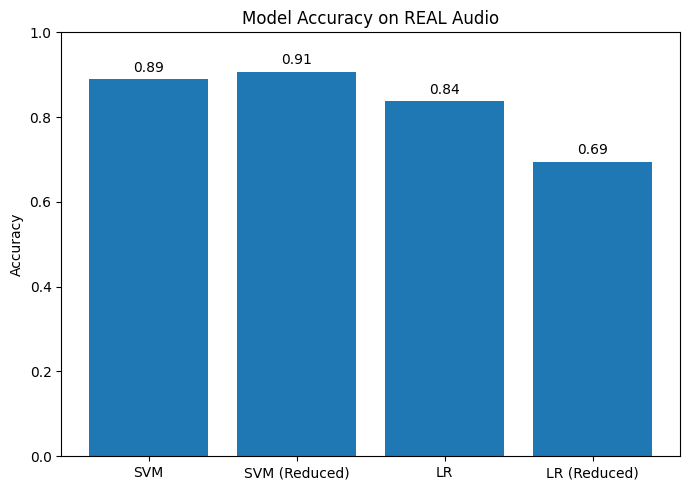

In [ ]:
# -------------------------------------------------------------
# Plot 1: Accuracy for Real Audio
# -------------------------------------------------------------
plt.figure(figsize=(7, 5))
bars = plt.bar(models, real_acc)
plt.ylabel("Accuracy")
plt.title("Model Accuracy on REAL Audio")
plt.ylim(0, 1)

# Add values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}",
             ha="center", va="bottom")

plt.tight_layout()
plot_path = "/content/drive/MyDrive/AiAudio_PR_Project/AiAudio_Plot"
plt.savefig(plot_path+"/real_acc_4models.png", dpi=300, bbox_inches='tight')
plt.show()

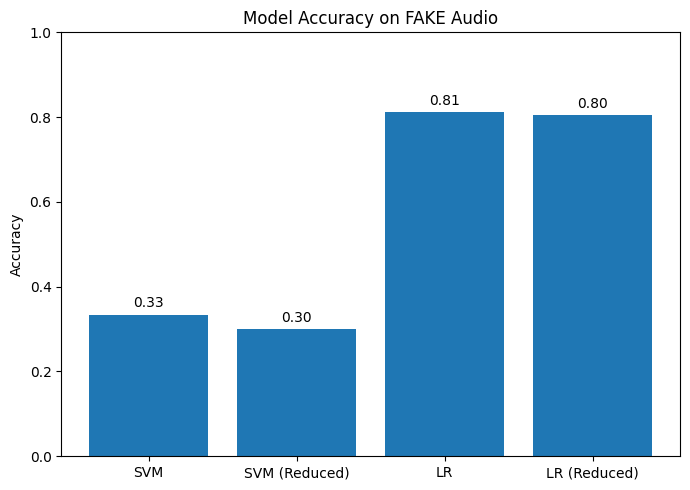

In [ ]:


# -------------------------------------------------------------
# Plot 2: Accuracy for Fake Audio
# -------------------------------------------------------------
plt.figure(figsize=(7, 5))
bars = plt.bar(models, fake_acc)
plt.ylabel("Accuracy")
plt.title("Model Accuracy on FAKE Audio")
plt.ylim(0, 1)

# Add values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}",
             ha="center", va="bottom")


plt.tight_layout()
plot_path = "/content/drive/MyDrive/AiAudio_PR_Project/AiAudio_Plot"
plt.savefig(plot_path+"/fake_acc_4models.png", dpi=300, bbox_inches='tight')
plt.show()

LORIS9,7 plots

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ["LORIS7", "LORIS9"]


real_acc = [loris1_real_accuracy, loris2_real_accuracy]

fake_acc = [loris1_fake_accuracy, loris2_fake_accuracy]

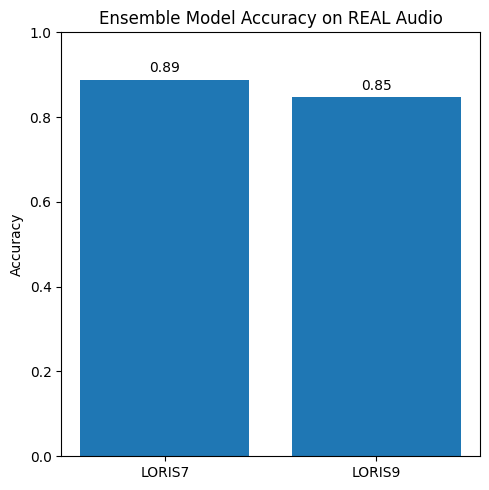

In [ ]:
# -------------------------------------------------------------
# Plot 1: Accuracy for Real Audio
# -------------------------------------------------------------
plt.figure(figsize=(5, 5))
bars = plt.bar(models, real_acc)
plt.ylabel("Accuracy")
plt.title("Ensemble Model Accuracy on REAL Audio")
plt.ylim(0, 1)

# Add values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}",
             ha="center", va="bottom")

plt.tight_layout()
plot_path = "/content/drive/MyDrive/AiAudio_PR_Project/AiAudio_Plot"
plt.savefig(plot_path+"/real_acc_Ensemble_models.png", dpi=300, bbox_inches='tight')
plt.show()

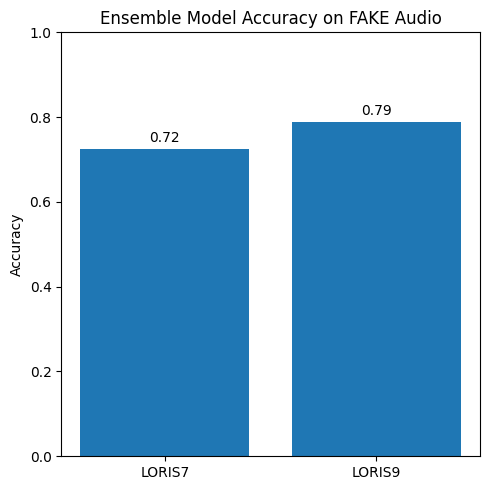

In [ ]:


# -------------------------------------------------------------
# Plot 2: Accuracy for Fake Audio
# -------------------------------------------------------------
plt.figure(figsize=(5, 5))
bars = plt.bar(models, fake_acc)
plt.ylabel("Accuracy")
plt.title("Ensemble Model Accuracy on FAKE Audio")
plt.ylim(0, 1)

# Add values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}",
             ha="center", va="bottom")


plt.tight_layout()
plot_path = "/content/drive/MyDrive/AiAudio_PR_Project/AiAudio_Plot"
plt.savefig(plot_path+"/fake_acc_Ensemble_models.png", dpi=300, bbox_inches='tight')
plt.show()

#CNN - cancel not doing

In [ ]:
# train_rawcnn_for.py
# Full PyTorch script — raw-waveform CNN (paper-inspired) with robust loader + sliding-window inference
# Change only DATA_ROOT variable to point to your FoR data root.

import os
import glob
import random
import math
from pathlib import Path
import sys
import time
import warnings

import numpy as np
import soundfile as sf
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW, SGD
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

warnings.filterwarnings("ignore")

# ---------------- USER SETTINGS (change only DATA_ROOT) ----------------
DATA_ROOT = cnn_path   # <<-- CHANGE THIS to your FoR root
# Expected structure under DATA_ROOT:
#   train/real/*.wav
#   train/fake/*.wav
#   val/real/*.wav
#   val/fake/*.wav
#   test/real/*.wav
#   test/fake/*.wav

SR = 16000
CONTEXT_MS = 270
CONTEXT_SAMPLES = int(SR * CONTEXT_MS / 1000)  # 4320
FRAME_MS = 10
FRAME_SAMPLES = int(SR * FRAME_MS / 1000)      # 160

# Paper hyperparams mapped to samples (frames -> samples)
conv_kernel_frames = [10, 5, 9]
conv_kernel_samples = [k * FRAME_SAMPLES for k in conv_kernel_frames]    # [1600, 800, 1440]
conv_strides_frames = [10, 1, 1]
conv_strides = [s * FRAME_SAMPLES for s in conv_strides_frames]           # [1600, 160, 160]
NUM_FILTERS = 90
POOL_WIDTH = 3

# Training hyperparams
BATCH_SIZE = 32
LR = 1e-3
WEIGHT_DECAY = 1e-4
EPOCHS = 25
DROPOUT = 0.3
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
USE_SGD = False  # set True to reproduce paper's SGD behavior

# Reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

# ---------------- Robust Dataset ----------------
class RawAudioDataset(Dataset):
    """Robust raw waveform dataset. Expects list of (path,label). Pads/trims to CONTEXT_SAMPLES."""
    def __init__(self, items, sr=SR, context_samples=CONTEXT_SAMPLES, augment=False, debug=False):
        self.items = items
        self.sr = sr
        self.context = int(context_samples)
        self.augment = augment
        self.debug = debug

    def __len__(self):
        return len(self.items)

    def _load(self, path):
        """Return 1D np.float32 mono waveform resampled to self.sr, or zeros if failure."""
        try:
            y, sr = sf.read(path, dtype='float32')
        except Exception as exc:
            if self.debug:
                print(f"[WARN] sf.read failed for {path}: {exc}")
            return np.zeros(self.context, dtype=np.float32)

        if y is None:
            if self.debug:
                print(f"[WARN] sf.read returned None for {path}")
            return np.zeros(self.context, dtype=np.float32)

        y = np.asarray(y, dtype=np.float32)
        # If multi-channel, convert to mono
        if y.ndim > 1:
            y = np.mean(y, axis=1)

        # Ensure 1D
        y = y.reshape(-1)

        # handle empty
        if y.size == 0:
            if self.debug:
                print(f"[WARN] empty audio {path}")
            return np.zeros(self.context, dtype=np.float32)

        # Resample if needed (simple linear interp fallback)
        if sr != self.sr:
            try:
                duration = y.shape[0] / float(sr)
                new_len = int(round(duration * self.sr))
                if new_len <= 0:
                    if self.debug:
                        print(f"[WARN] new_len <=0 after resample for {path}")
                    return np.zeros(self.context, dtype=np.float32)
                y = np.interp(np.linspace(0, len(y)-1, new_len), np.arange(len(y)), y).astype(np.float32)
            except Exception as exc:
                if self.debug:
                    print(f"[WARN] resample failed for {path}: {exc}")
                return np.zeros(self.context, dtype=np.float32)

        # Replace NaN/inf
        if not np.isfinite(y).all():
            y = np.nan_to_num(y, nan=0.0, posinf=0.0, neginf=0.0)

        return y

    def __getitem__(self, idx):
        path, label = self.items[idx]
        y = self._load(path)
        y = np.asarray(y, dtype=np.float32).reshape(-1)

        # pad or trim to context
        if len(y) >= self.context:
            if self.augment:
                max_start = len(y) - self.context
                start = random.randint(0, max_start) if max_start > 0 else 0
            else:
                start = (len(y) - self.context) // 2
            y = y[start:start + self.context]
        else:
            pad = self.context - len(y)
            left = pad // 2
            right = pad - left
            y = np.pad(y, (left, right), mode='constant', constant_values=0.0)

        if y.size != self.context:
            # final fallback
            if self.debug:
                print(f"[WARN] length mismatch for {path}, got {y.size}, expected {self.context}")
            y = np.zeros(self.context, dtype=np.float32)

        # normalize
        std = y.std()
        if std > 1e-9:
            y = (y - y.mean()) / (std + 1e-9)
        else:
            y = y - y.mean()

        x = torch.from_numpy(y).float().unsqueeze(0)  # shape (1, context)
        return x, torch.tensor(label, dtype=torch.long)

# ---------------- Model ----------------
class RawCNN(nn.Module):
    def __init__(self, in_channels=1, num_classes=2):
        super().__init__()
        # conv layers (1D)
        self.conv1 = nn.Conv1d(in_channels, NUM_FILTERS, kernel_size=conv_kernel_samples[0], stride=conv_strides[0], padding=0)
        self.bn1 = nn.BatchNorm1d(NUM_FILTERS)

        self.conv2 = nn.Conv1d(NUM_FILTERS, NUM_FILTERS, kernel_size=conv_kernel_samples[1], stride=conv_strides[1], padding=0)
        self.bn2 = nn.BatchNorm1d(NUM_FILTERS)

        self.conv3 = nn.Conv1d(NUM_FILTERS, NUM_FILTERS, kernel_size=conv_kernel_samples[2], stride=conv_strides[2], padding=0)
        self.bn3 = nn.BatchNorm1d(NUM_FILTERS)

        self.pool = nn.MaxPool1d(kernel_size=POOL_WIDTH, stride=POOL_WIDTH)

        # compute fc input size dynamically
        dummy = torch.zeros(1, in_channels, CONTEXT_SAMPLES)
        with torch.no_grad():
            out = self._forward_conv(dummy)
            conv_out_size = out.shape[1] * out.shape[2]
        fc_in = conv_out_size

        self.fc1 = nn.Linear(fc_in, 128)
        self.dropout = nn.Dropout(DROPOUT)
        self.fc2 = nn.Linear(128, num_classes)

    def _forward_conv(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.pool(x)
        return x

    def forward(self, x):
        x = self._forward_conv(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# ---------------- Utilities ----------------
def make_file_list(root):
    """Look for train/val/test under root; fallback to single folder split if absent."""
    def gather(sub):
        real = sorted(glob.glob(os.path.join(root, sub, "real", "*.wav")))
        fake = sorted(glob.glob(os.path.join(root, sub, "fake", "*.wav")))
        return [(p, 0) for p in real] + [(p, 1) for p in fake]

    train = gather("training")
    val = gather("validation")
    test = gather("testing")

    # If explicit splits missing, try fallback: root/real root/fake and random split
    if len(train) == 0 and len(val) == 0 and len(test) == 0:
        print("[WARN] train/val/test structure not found under root, falling back to splitting all WAVs in root/real & root/fake")
        real = sorted(glob.glob(os.path.join(root, "real", "*.wav")))
        fake = sorted(glob.glob(os.path.join(root, "fake", "*.wav")))
        items = [(p, 0) for p in real] + [(p, 1) for p in fake]
        random.shuffle(items)
        n = len(items)
        ntr = int(0.8 * n)
        nval = int(0.1 * n)
        train = items[:ntr]
        val = items[ntr:ntr+nval]
        test = items[ntr+nval:]
    return train, val, test

def collate_fn(batch):
    xs = torch.stack([b[0] for b in batch], dim=0)
    ys = torch.stack([b[1] for b in batch], dim=0)
    return xs, ys

def train_epoch(model, loader, optimizer, criterion):
    model.train()
    losses = []
    all_preds, all_trues = [], []
    for x, y in loader:
        x = x.to(DEVICE)
        y = y.to(DEVICE)
        logits = model(x)
        loss = criterion(logits, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        all_preds += torch.argmax(logits.detach().cpu(), dim=1).tolist()
        all_trues += y.detach().cpu().tolist()
    acc = accuracy_score(all_trues, all_preds) if len(all_trues)>0 else 0.0
    return np.mean(losses) if losses else 0.0, acc

def eval_model(model, loader, criterion):
    model.eval()
    losses = []
    all_preds, all_trues = [], []
    with torch.no_grad():
        for x, y in loader:
            x = x.to(DEVICE)
            y = y.to(DEVICE)
            logits = model(x)
            loss = criterion(logits, y)
            losses.append(loss.item())
            all_preds += torch.argmax(logits.detach().cpu(), dim=1).tolist()
            all_trues += y.detach().cpu().tolist()
    if len(all_trues)==0:
        return 0,0,0,0,0, np.zeros((2,2), dtype=int)
    acc = accuracy_score(all_trues, all_preds)
    prec, rec, f1, _ = precision_recall_fscore_support(all_trues, all_preds, average='binary', zero_division=0)
    cm = confusion_matrix(all_trues, all_preds)
    return np.mean(losses), acc, prec, rec, f1, cm

# Sliding-window inference for long clips
def sliding_infer_clip(model, path, window_samples=CONTEXT_SAMPLES, hop_samples=int(0.05*SR)):
    """Return averaged probability per clip. hop default 50ms."""
    y, sr = None, None
    try:
        y, sr = sf.read(path, dtype='float32')
    except Exception as e:
        return None
    if y is None:
        return None
    y = np.asarray(y, dtype=np.float32)
    if y.ndim > 1:
        y = np.mean(y, axis=1)
    if sr != SR:
        duration = y.shape[0] / float(sr)
        new_len = int(round(duration * SR))
        if new_len <= 0:
            return None
        y = np.interp(np.linspace(0, len(y)-1, new_len), np.arange(len(y)), y).astype(np.float32)

    # produce windows
    if len(y) < window_samples:
        pads = window_samples - len(y)
        y = np.pad(y, (pads//2, pads-pads//2), mode='constant', constant_values=0.0)

    hop = hop_samples
    probs = []
    model.eval()
    with torch.no_grad():
        for start in range(0, max(1, len(y)-window_samples+1), hop):
            seg = y[start:start+window_samples]
            seg = (seg - seg.mean()) / (seg.std()+1e-9) if seg.std()>1e-9 else (seg - seg.mean())
            x = torch.from_numpy(seg).float().unsqueeze(0).unsqueeze(0).to(DEVICE)
            logits = model(x)
            p = F.softmax(logits, dim=1).cpu().numpy()[0]
            probs.append(p)
    if len(probs) == 0:
        return None
    avg = np.mean(np.stack(probs, axis=0), axis=0)
    return avg  # array length 2: prob per class

# ---------------- Main ----------------
def main():
    if not os.path.isdir(DATA_ROOT):
        print(f"[ERROR] DATA_ROOT '{DATA_ROOT}' not found. Edit script and set correct path.")
        sys.exit(1)

    train_items, val_items, test_items = make_file_list(DATA_ROOT)
    print(f"Found: train={len(train_items)} val={len(val_items)} test={len(test_items)}")

    # quick debug print top few
    for i, it in enumerate(train_items[:5]):
        print("  TRAIN sample:", it)

    train_ds = RawAudioDataset(train_items, augment=True, debug=False)
    val_ds = RawAudioDataset(val_items, augment=False, debug=False)
    test_ds = RawAudioDataset(test_items, augment=False, debug=False)

    train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn, num_workers=4)
    val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn, num_workers=4)
    test_loader = DataLoader(test_ds, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn, num_workers=4)

    model = RawCNN(in_channels=1, num_classes=2).to(DEVICE)
    print("Model parameters (trainable):", sum(p.numel() for p in model.parameters() if p.requires_grad))
    criterion = nn.CrossEntropyLoss()

    if USE_SGD:
        optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=WEIGHT_DECAY)
    else:
        optimizer = AdamW(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)

    best_val_f1 = 0.0
    best_epoch = 0
    for epoch in range(1, EPOCHS+1):
        t0 = time.time()
        train_loss, train_acc = train_epoch(model, train_loader, optimizer, criterion)
        val_loss, val_acc, val_prec, val_rec, val_f1, cm = eval_model(model, val_loader, criterion)
        t1 = time.time()
        print(f"Epoch {epoch}/{EPOCHS}  time={t1-t0:.1f}s  train_loss={train_loss:.4f}  train_acc={train_acc:.3f}  "
              f"val_loss={val_loss:.4f}  val_acc={val_acc:.3f}  val_prec={val_prec:.3f}  val_rec={val_rec:.3f}  val_f1={val_f1:.3f}")
        print("Confusion matrix (val):")
        print(cm)

        if val_f1 > best_val_f1:
            best_val_f1 = val_f1
            best_epoch = epoch
            torch.save(model.state_dict(), "best_rawcnn_ai_vs_human.pth")
            print("Saved best model (by val F1).")

    print("Training finished. Best val F1:", best_val_f1, "at epoch", best_epoch)

    # Final test evaluation (if test set provided)
    if len(test_items) > 0:
        print("Loading best model and evaluating on test set...")
        model.load_state_dict(torch.load("best_rawcnn_ai_vs_human.pth", map_location=DEVICE))
        test_loss, test_acc, test_prec, test_rec, test_f1, test_cm = eval_model(model, test_loader, criterion)
        print(f"Test results -- loss={test_loss:.4f} acc={test_acc:.3f} prec={test_prec:.3f} rec={test_rec:.3f} f1={test_f1:.3f}")
        print("Confusion matrix (test):")
        print(test_cm)
    else:
        print("[WARN] No test items found; skipped final test evaluation.")

    # Example of sliding-window inference on single file (uncomment to run)
    # example_path = "/path/to/some_long_clip.wav"
    # probs = sliding_infer_clip(model, example_path)
    # print("Slide-infer probs:", probs)

if __name__ == "__main__":
    main()
